[17- Recurrent Neural Networks Explained Easily](https://www.youtube.com/watch?v=DY82Goknf0s)

[18- Long Short Term Memory (LSTM) Networks Explained Easily](https://www.youtube.com/watch?v=eCvz-kB4yko)

[19- How to Implement an RNN-LSTM Network for Music Genre Classification](https://www.youtube.com/watch?v=4nXI0h2sq2I)

# Recurrent Neural Networks explained esily

### RNN's
- Order is important
- Variable length
- Used for sequential data
- Each item is processed in context
- Ideal for audio/music



### Univariate time series
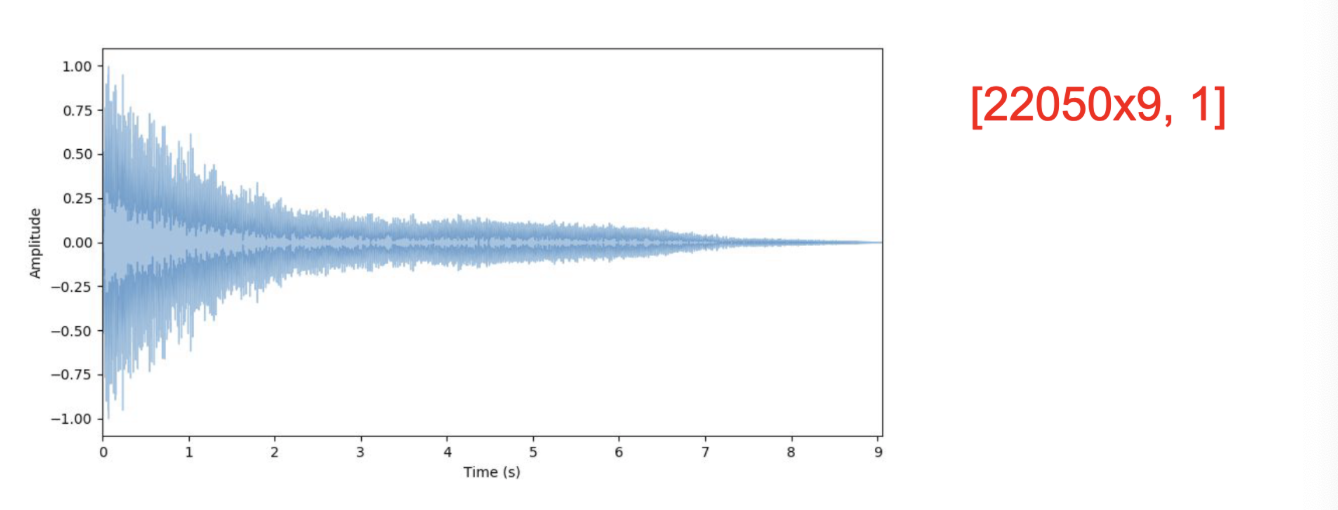

### Multivariate time series

MFCC's is a multivariate time series

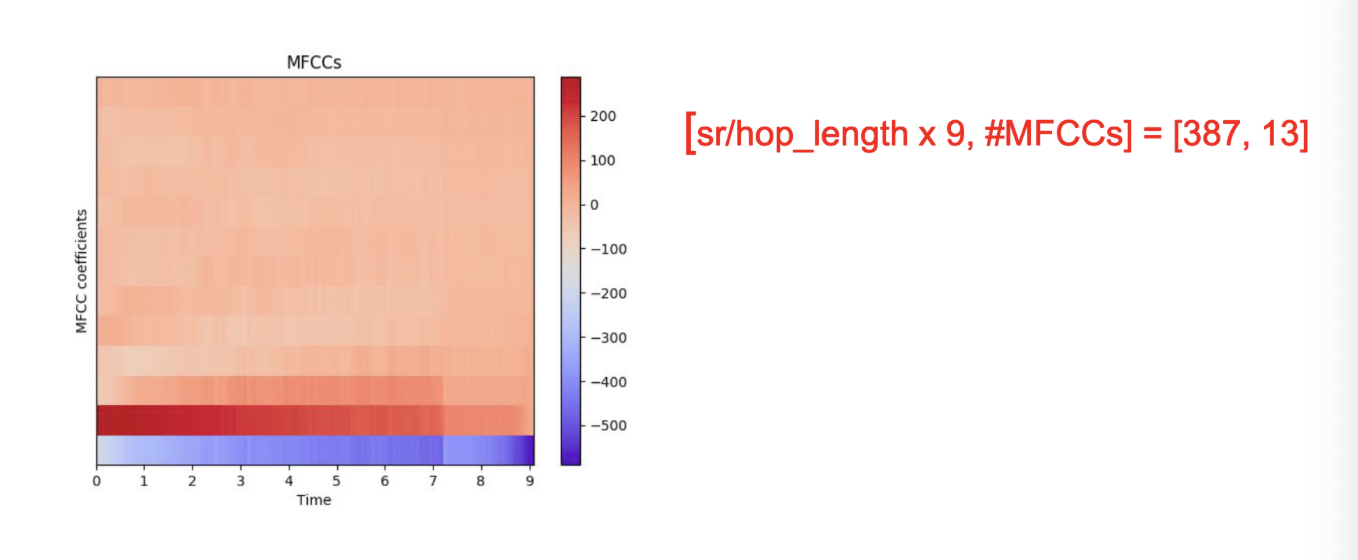

### Intuition
- Input data points one at a time
- Predict next step
- Prediction depends on previous data points

### RNN architecture
X -> Recurrent Layer -> Dense Layer -> Y

shape of X = [batch size, # of steps, # of dimensions]

### Recurrent Layer and Unrolling it
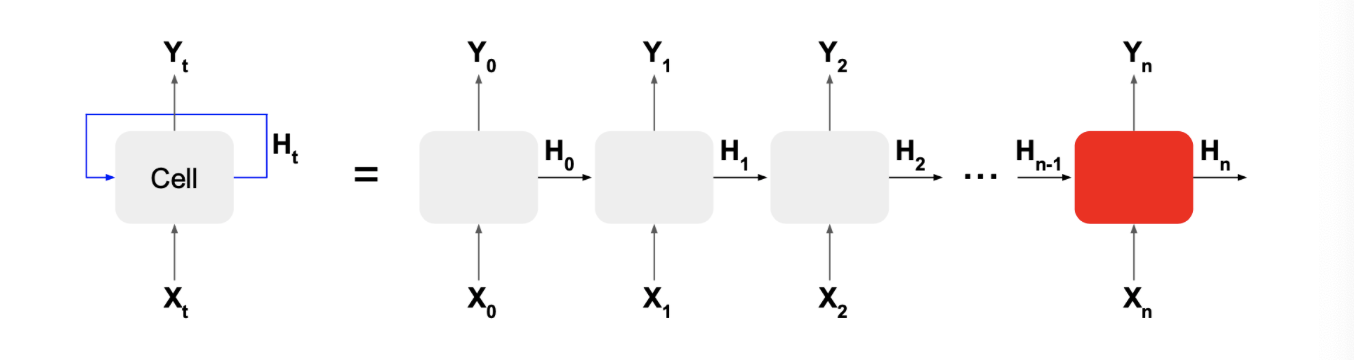

### Data shape
[batch size, # of steps, # of dimensions] = [2, 9, 1]

input at each step = [batch size, # of dimensions] -> [2,1] in the example

output at each step = [batch size, # of units] -> [2, 3] in the example

output shape = [batch size, # of steps, # of units] = [2, 9, 3]

Ht = Yt

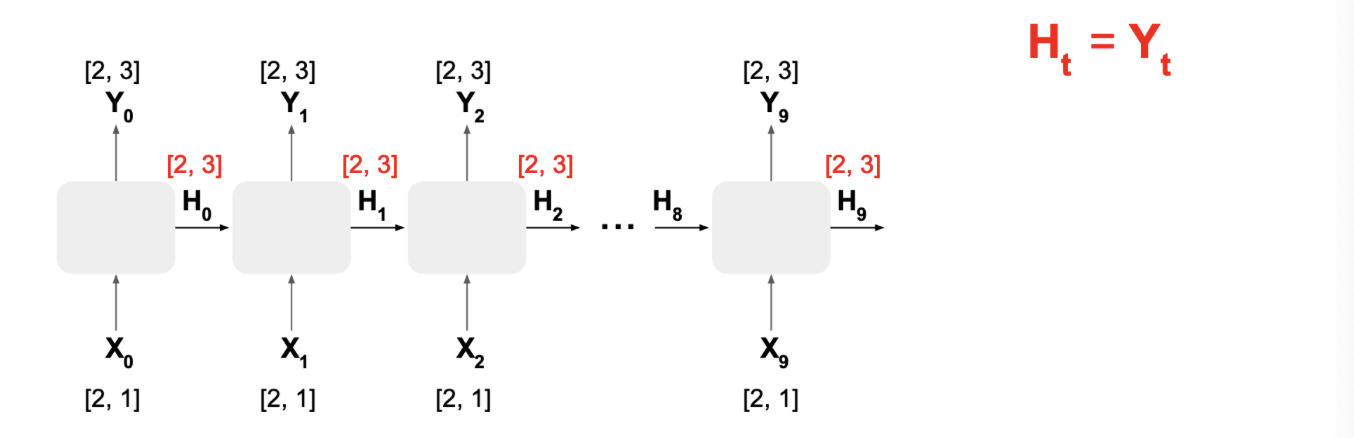


### Memory cell for simple RNN
- Dense layer
- Input = state vector + input data
- Activation function = tanh

### Why use tanh?
- Training RNNs is difficult
- Vanishing gradients + exploding gradients
- RELU can explode!
- tanh maintains values in [-1, 1]

### Backpropagation through time (BPTT)
- Error is back propagated through time
- RNN is unrolled and treated as a feedforward network
- Very deep network!
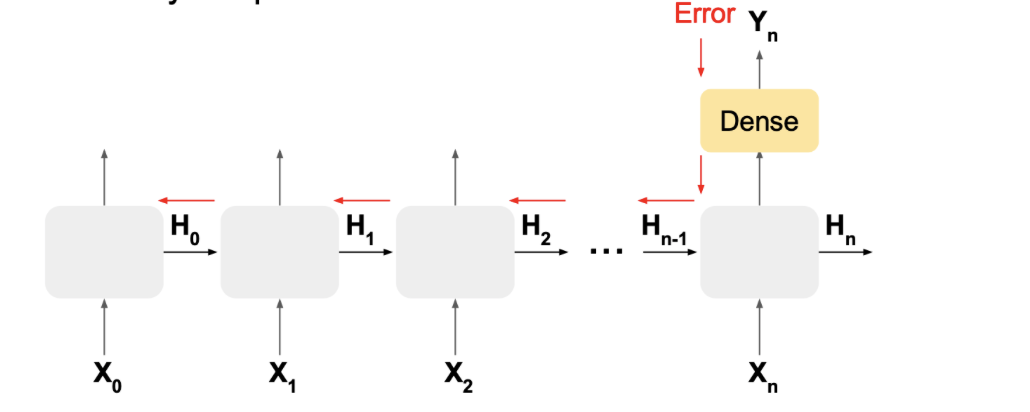

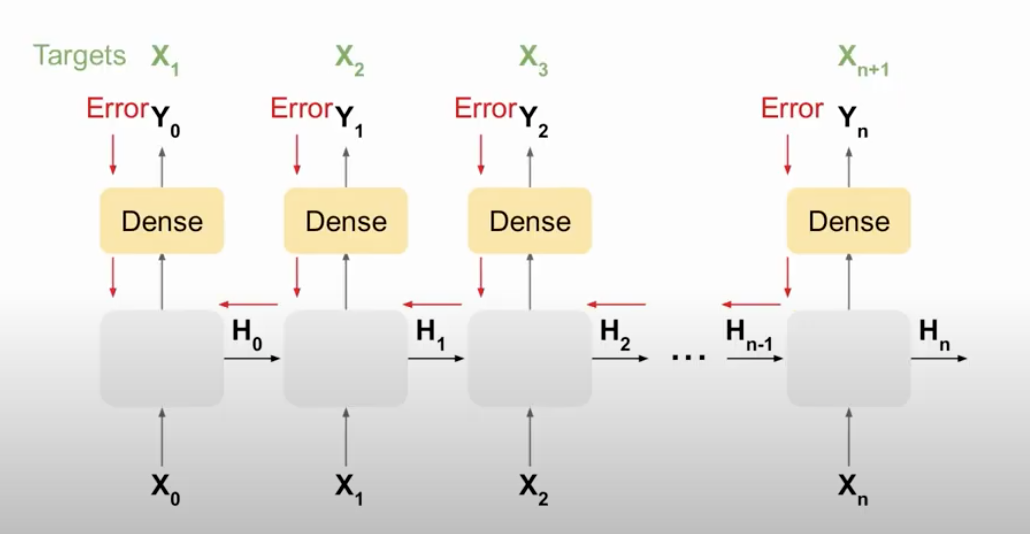


### The Math

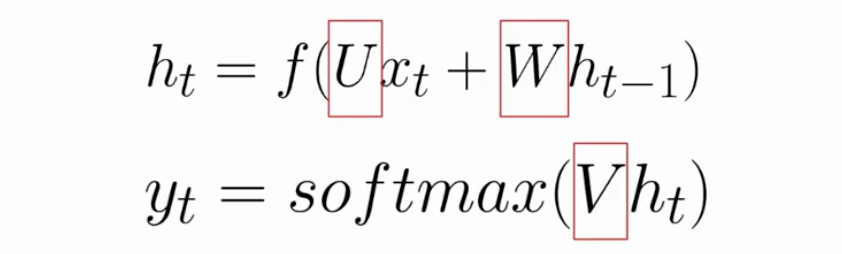

### Issues with simple RNNs
- No long-term memory
- Network can't use info from the distant past
- Can't learn petterns with long dependencies

# LSTM networks explained easily

### Long Short Term Memory
- Special type of RNN
- Can learn long-term patterns
- Detects patterns with 100 steps
- Struggles with 100s/1000s of steps

### Simple RNN vs LSTM
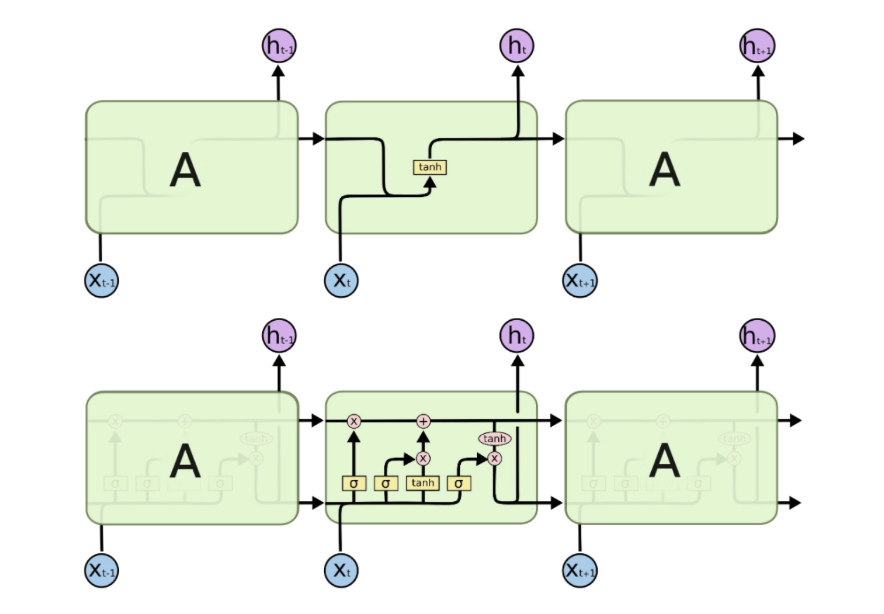

### LSTM cell
- Contains a simple RNN cell
- Second state vector = cell state = long-term memory
- Forget gate
- Input gate
- Output gate
- Gates work as filters

##### Components
- ht = output (small one is also hidden state / short-term memory)
- Ct = cell state
  - Cell state updated twice
    - x = decide what to forget
    - decide what new info to remember
  - Few computations -> stabilise gradients
- Xt = input

Sigmoid function

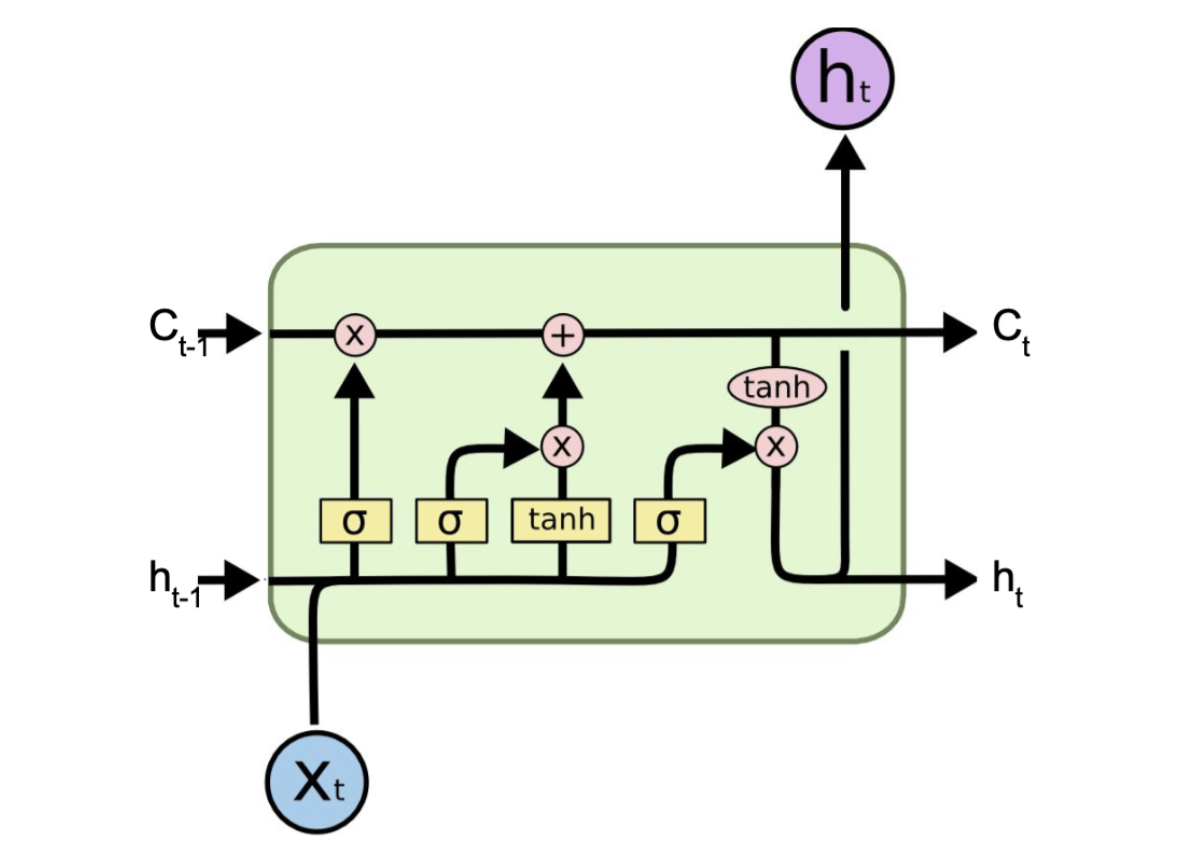

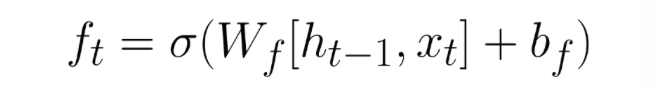

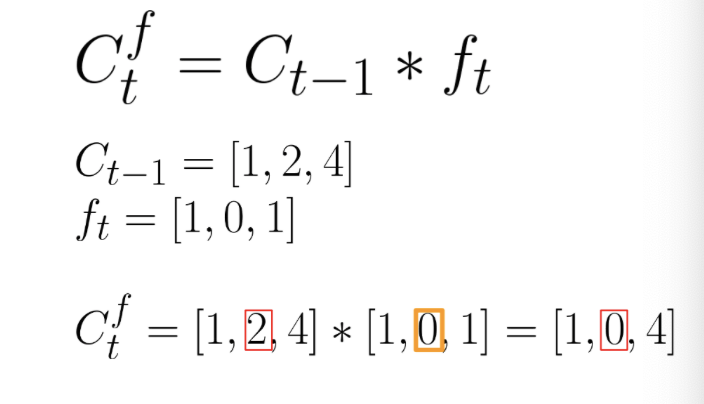

##### Input
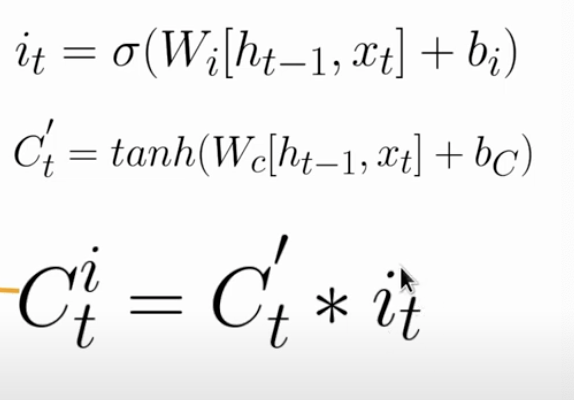

Ct = Cft + Cit

##### Output
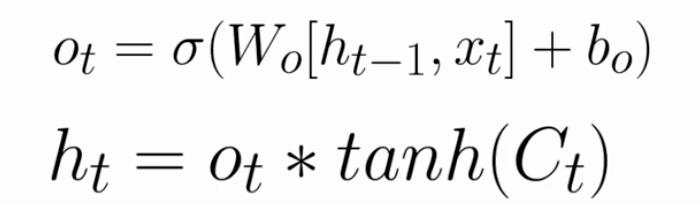

### LSTM Variant
- Gated Recurrent Unit - GRU

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# to mount to my personal google drive that conatins data_extract_music.json

In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
# same json from vid 13
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data_extract_music.json"

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [ ]:
def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [ ]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)